## Christmas Movies Data Analysis ##

A Christmas movie data analysis project is a festive and engaging way to combine data science with holiday spirit. It’s not only a fun way to showcase your technical skills but also provides opportunities to extract meaningful insights from popular seasonal trends. Such a project could analyze trends like the most common Christmas movie tropes, popular genres, release patterns, or audience ratings. This creates an enjoyable, relatable dataset that can captivate audiences, whether you're showcasing it on a blog, in a portfolio, or as part of a larger themed project like an advent calendar.



### Imports ###

In [66]:
pip install plotly_express

Note: you may need to restart the kernel to use updated packages.


In [67]:
import numpy as np # linear algebra
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import plotly_express as px

### File loading ###

Make sure to adjust the file path depending on where it is in your system!

In [70]:
df = pd.read_csv('christmas_movies.csv')
df

title rating  runtime  \
0                                        Love Actually      R    135.0   
1                                           Home Alone     PG    103.0   
2                National Lampoon's Christmas Vacation  PG-13     97.0   
3                                                  Elf     PG     97.0   
4                       How the Grinch Stole Christmas     PG    104.0   
..                                                 ...    ...      ...   
868  CBS News Sunday Morning with Jane Pauley: Epis...   TV-G      NaN   
869          Honest Ads: If Holiday Movies Were Honest    NaN      NaN   
870                   Cosmic Cowboys: Céréal Christmas    NaN      NaN   
871  Proper Manors: Christmas Special: Christmas Pa...    NaN     20.0   
872      Sacred Music at Christmas: A Choral Christmas    NaN      NaN   

     imdb_rating  meta_score                      genre  release_year  \
0            7.6        55.0     Comedy, Drama, Romance        2003.0   
1            7.7        63.0             Comedy, Family        1990.0   
2            7.5        49.0                     Comedy        1989.0   
3            7.1        66.0  Adventure, Comedy, Family        2003.0   
4            6.3        46.0    Comedy, Family, Fantasy        2000.0   
..           ...         ...                        ...           ...   
868          NaN         NaN            News, Talk-Show        1979.0   
869          NaN         NaN              Short, Comedy        2012.0   
870          NaN         NaN                  Animation        2004.0   
871          NaN         NaN      Action, Comedy, Crime        2012.0   
872          NaN         NaN         Documentary, Music        2010.0   

                                           description             director  \
0    Follows the lives of eight very different coup...       Richard Curtis   
1    An eight-year-old troublemaker, mistakenly lef...       Chris Columbus   
2    The Griswold family's plans for a big family C...  Jeremiah S. Chechik   
3    Raised as an oversized elf, Buddy travels from...          Jon Favreau   
4    On the outskirts of Whoville lives a green, re...           Ron Howard   
..                                                 ...                  ...   
868  The popularity of pickup trucks; Luke Burbank ...  Kate D'Arcy-Coleman   
869  What if Hollywood were honest about how they m...      Michael Strauss   
870                                         Add a Plot                  NaN   
871  Miles Barnes is forced to throw contractually-...         Dallin Boyce   
872                                         Add a Plot                  NaN   

                                                 stars    votes     gross  \
0    Hugh Grant, Martine McCutcheon, Liam Neeson, L...  517,283   $59.70M   
1    Macaulay Culkin, Joe Pesci, Daniel Stern, John...  629,713  $285.76M   
2    Chevy Chase, Beverly D'Angelo, Juliette Lewis,...  213,196   $71.32M   
3    Will Ferrell, James Caan, Bob Newhart, Zooey D...  300,546  $173.40M   
4    Jim Carrey, Taylor Momsen, Kelley, Jeffrey Tam...  280,898  $260.04M   
..                                                 ...      ...       ...   
868  Jane Pauley, Serena Altschul, Nicholas Britell...      NaN       NaN   
869         Jack Hunter, Britt Migs, Michael Strauss,       NaN       NaN   
870                                                NaN      NaN       NaN   
871  Brandyn Cross, Peter D'Alessio, Janis Race-Big...      NaN       NaN   
872                                                NaN      NaN       NaN   

                                               img_src        type  
0    https://m.media-amazon.com/images/M/MV5BNThkNj...       Movie  
1    https://m.media-amazon.com/images/M/MV5BMzFkM2...       Movie  
2    https://m.media-amazon.com/images/M/MV5BMGZkMW...       Movie  
3    https://m.media-amazon.com/images/M/MV5BMzUxNz...       Movie  
4    https://m.media-amazon.com/images/M/MV5BNWNiNT...       Mov

In [71]:
df.shape


(873, 14)

In pandas, df.shape is an attribute that provides the dimensions of a DataFrame (df). It returns a tuple containing two values:

Number of Rows: The first element of the tuple represents the total number of rows in the DataFrame.
Number of Columns: The second element of the tuple represents the total number of columns in the DataFrame.

### What df.info() Does and What It Tells Us ###
The df.info() method in pandas provides a concise summary of a DataFrame's structure and contents. It is a valuable tool for understanding the dataset's metadata, helping you quickly assess its overall structure and the types of data it contains.

### Key Outputs of df.info() ###
Index Information:

Displays the range of the DataFrame index (e.g., RangeIndex: 0 to 99 for a DataFrame with 100 rows).
Column Names:

Lists all the columns present in the DataFrame.
Non-Null Counts:

Shows the number of non-missing (non-null) values for each column, helping you assess missing data.
Data Types:

Displays the data type (int64, float64, object, etc.) of each column, helping you understand how the data is stored.
Memory Usage:

Provides the amount of memory consumed by the DataFrame.

In [74]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 873 entries, 0 to 872
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   title         873 non-null    object 
 1   rating        660 non-null    object 
 2   runtime       832 non-null    float64
 3   imdb_rating   839 non-null    float64
 4   meta_score    100 non-null    float64
 5   genre         872 non-null    object 
 6   release_year  862 non-null    float64
 7   description   873 non-null    object 
 8   director      868 non-null    object 
 9   stars         862 non-null    object 
 10  votes         839 non-null    object 
 11  gross         79 non-null     object 
 12  img_src       873 non-null    object 
 13  type          873 non-null    object 
dtypes: float64(4), object(10)
memory usage: 95.6+ KB


In [75]:
df.describe()


runtime  imdb_rating  meta_score  release_year
count  832.000000   839.000000  100.000000    862.000000
mean    86.596154     6.100477   57.650000   2009.498840
std     18.152062     0.966392   17.901174     20.274696
min      1.000000     1.300000   18.000000   1898.000000
25%     84.000000     5.600000   46.750000   2010.000000
50%     87.000000     6.200000   56.000000   2017.000000
75%     91.000000     6.700000   69.000000   2020.000000
max    199.000000     9.200000   96.000000   2023.000000

The df.describe() method in pandas generates a statistical summary of the DataFrame's numerical columns (by default). It provides key descriptive statistics for understanding the distribution and central tendency of the data.

### Key Outputs of df.describe() ###

When applied to numerical columns (default behavior):

Count: The number of non-missing (non-null) values in each column.
Mean: The average value of each column.
Standard Deviation (std): Measures how spread out the values are from the mean.
Minimum (min): The smallest value in each column.
25th Percentile (25%): The value below which 25% of the data falls.
50th Percentile (Median, 50%): The middle value of the data.
75th Percentile (75%): The value below which 75% of the data falls.
Maximum (max): The largest value in each column.

## Data Preprocessing (Important) ##

In [78]:
df = df.drop(['description','meta_score','gross', 'img_src'], axis=1)
df

title rating  runtime  \
0                                        Love Actually      R    135.0   
1                                           Home Alone     PG    103.0   
2                National Lampoon's Christmas Vacation  PG-13     97.0   
3                                                  Elf     PG     97.0   
4                       How the Grinch Stole Christmas     PG    104.0   
..                                                 ...    ...      ...   
868  CBS News Sunday Morning with Jane Pauley: Epis...   TV-G      NaN   
869          Honest Ads: If Holiday Movies Were Honest    NaN      NaN   
870                   Cosmic Cowboys: Céréal Christmas    NaN      NaN   
871  Proper Manors: Christmas Special: Christmas Pa...    NaN     20.0   
872      Sacred Music at Christmas: A Choral Christmas    NaN      NaN   

     imdb_rating                      genre  release_year  \
0            7.6     Comedy, Drama, Romance        2003.0   
1            7.7             Comedy, Family        1990.0   
2            7.5                     Comedy        1989.0   
3            7.1  Adventure, Comedy, Family        2003.0   
4            6.3    Comedy, Family, Fantasy        2000.0   
..           ...                        ...           ...   
868          NaN            News, Talk-Show        1979.0   
869          NaN              Short, Comedy        2012.0   
870          NaN                  Animation        2004.0   
871          NaN      Action, Comedy, Crime        2012.0   
872          NaN         Documentary, Music        2010.0   

                director                                              stars  \
0         Richard Curtis  Hugh Grant, Martine McCutcheon, Liam Neeson, L...   
1         Chris Columbus  Macaulay Culkin, Joe Pesci, Daniel Stern, John...   
2    Jeremiah S. Chechik  Chevy Chase, Beverly D'Angelo, Juliette Lewis,...   
3            Jon Favreau  Will Ferrell, James Caan, Bob Newhart, Zooey D...   
4             Ron Howard  Jim Carrey, Taylor Momsen, Kelley, Jeffrey Tam...   
..                   ...                                                ...   
868  Kate D'Arcy-Coleman  Jane Pauley, Serena Altschul, Nicholas Britell...   
869      Michael Strauss         Jack Hunter, Britt Migs, Michael Strauss,    
870                  NaN                                                NaN   
871         Dallin Boyce  Brandyn Cross, Peter D'Alessio, Janis Race-Big...   
872                  NaN                                                NaN   

       votes        type  
0    517,283       Movie  
1    629,713       Movie  
2    213,196       Movie  
3    300,546       Movie  
4    280,898       Movie  
..       ...         ...  
868      NaN  TV Episode  
869      NaN  TV Episode  
870      NaN  TV Episode  
871      NaN  TV Episode  
872      NaN  TV Episode  

[873 rows x 10 columns]

We're getting rid of the attributes that don't serve us and we won't focus on in the EDA process

In [80]:
df.isna().sum()


title             0
rating          213
runtime          41
imdb_rating      34
genre             1
release_year     11
director          5
stars            11
votes            34
type              0
dtype: int64

df.isna() is used to identify missing (NaN or None) values in a DataFrame. It returns a DataFrame of the same shape with True for missing values and False for non-missing values. When combined with .sum(), it calculates the total number of missing values in each column.



In [82]:
df.dropna(inplace=True)
df.shape

(654, 10)

This code removes all rows containing missing values (NaN) from the DataFrame df in place, then displays the updated dimensions (rows, columns) of the cleaned DataFrame.

In [84]:
print(df.dtypes)


title            object
rating           object
runtime         float64
imdb_rating     float64
genre            object
release_year    float64
director         object
stars            object
votes            object
type             object
dtype: object


In [85]:
df["release_year"] = df["release_year"].astype(int)
df["votes"] = df["votes"].str.replace(',', '')
df["votes"] = df["votes"].astype(int)
df.head()

title rating  runtime  imdb_rating  \
0                          Love Actually      R    135.0          7.6   
1                             Home Alone     PG    103.0          7.7   
2  National Lampoon's Christmas Vacation  PG-13     97.0          7.5   
3                                    Elf     PG     97.0          7.1   
4         How the Grinch Stole Christmas     PG    104.0          6.3   

                       genre  release_year             director  \
0     Comedy, Drama, Romance          2003       Richard Curtis   
1             Comedy, Family          1990       Chris Columbus   
2                     Comedy          1989  Jeremiah S. Chechik   
3  Adventure, Comedy, Family          2003          Jon Favreau   
4    Comedy, Family, Fantasy          2000           Ron Howard   

                                               stars   votes   type  
0  Hugh Grant, Martine McCutcheon, Liam Neeson, L...  517283  Movie  
1  Macaulay Culkin, Joe Pesci, Daniel Stern, John...  629713  Movie  
2  Chevy Chase, Beverly D'Angelo, Juliette Lewis,...  213196  Movie  
3  Will Ferrell, James Caan, Bob Newhart, Zooey D...  300546  Movie  
4  Jim Carrey, Taylor Momsen, Kelley, Jeffrey Tam...  280898  Movie

Converting the release_year column to integers, removes commas from the votes column strings, converts votes to integers, and displays the first five rows of the DataFrame.

## Data Visualization ##

Let's work on recognizing insights into the data and what it tells us about how we perceive these movies and what we can learn from them

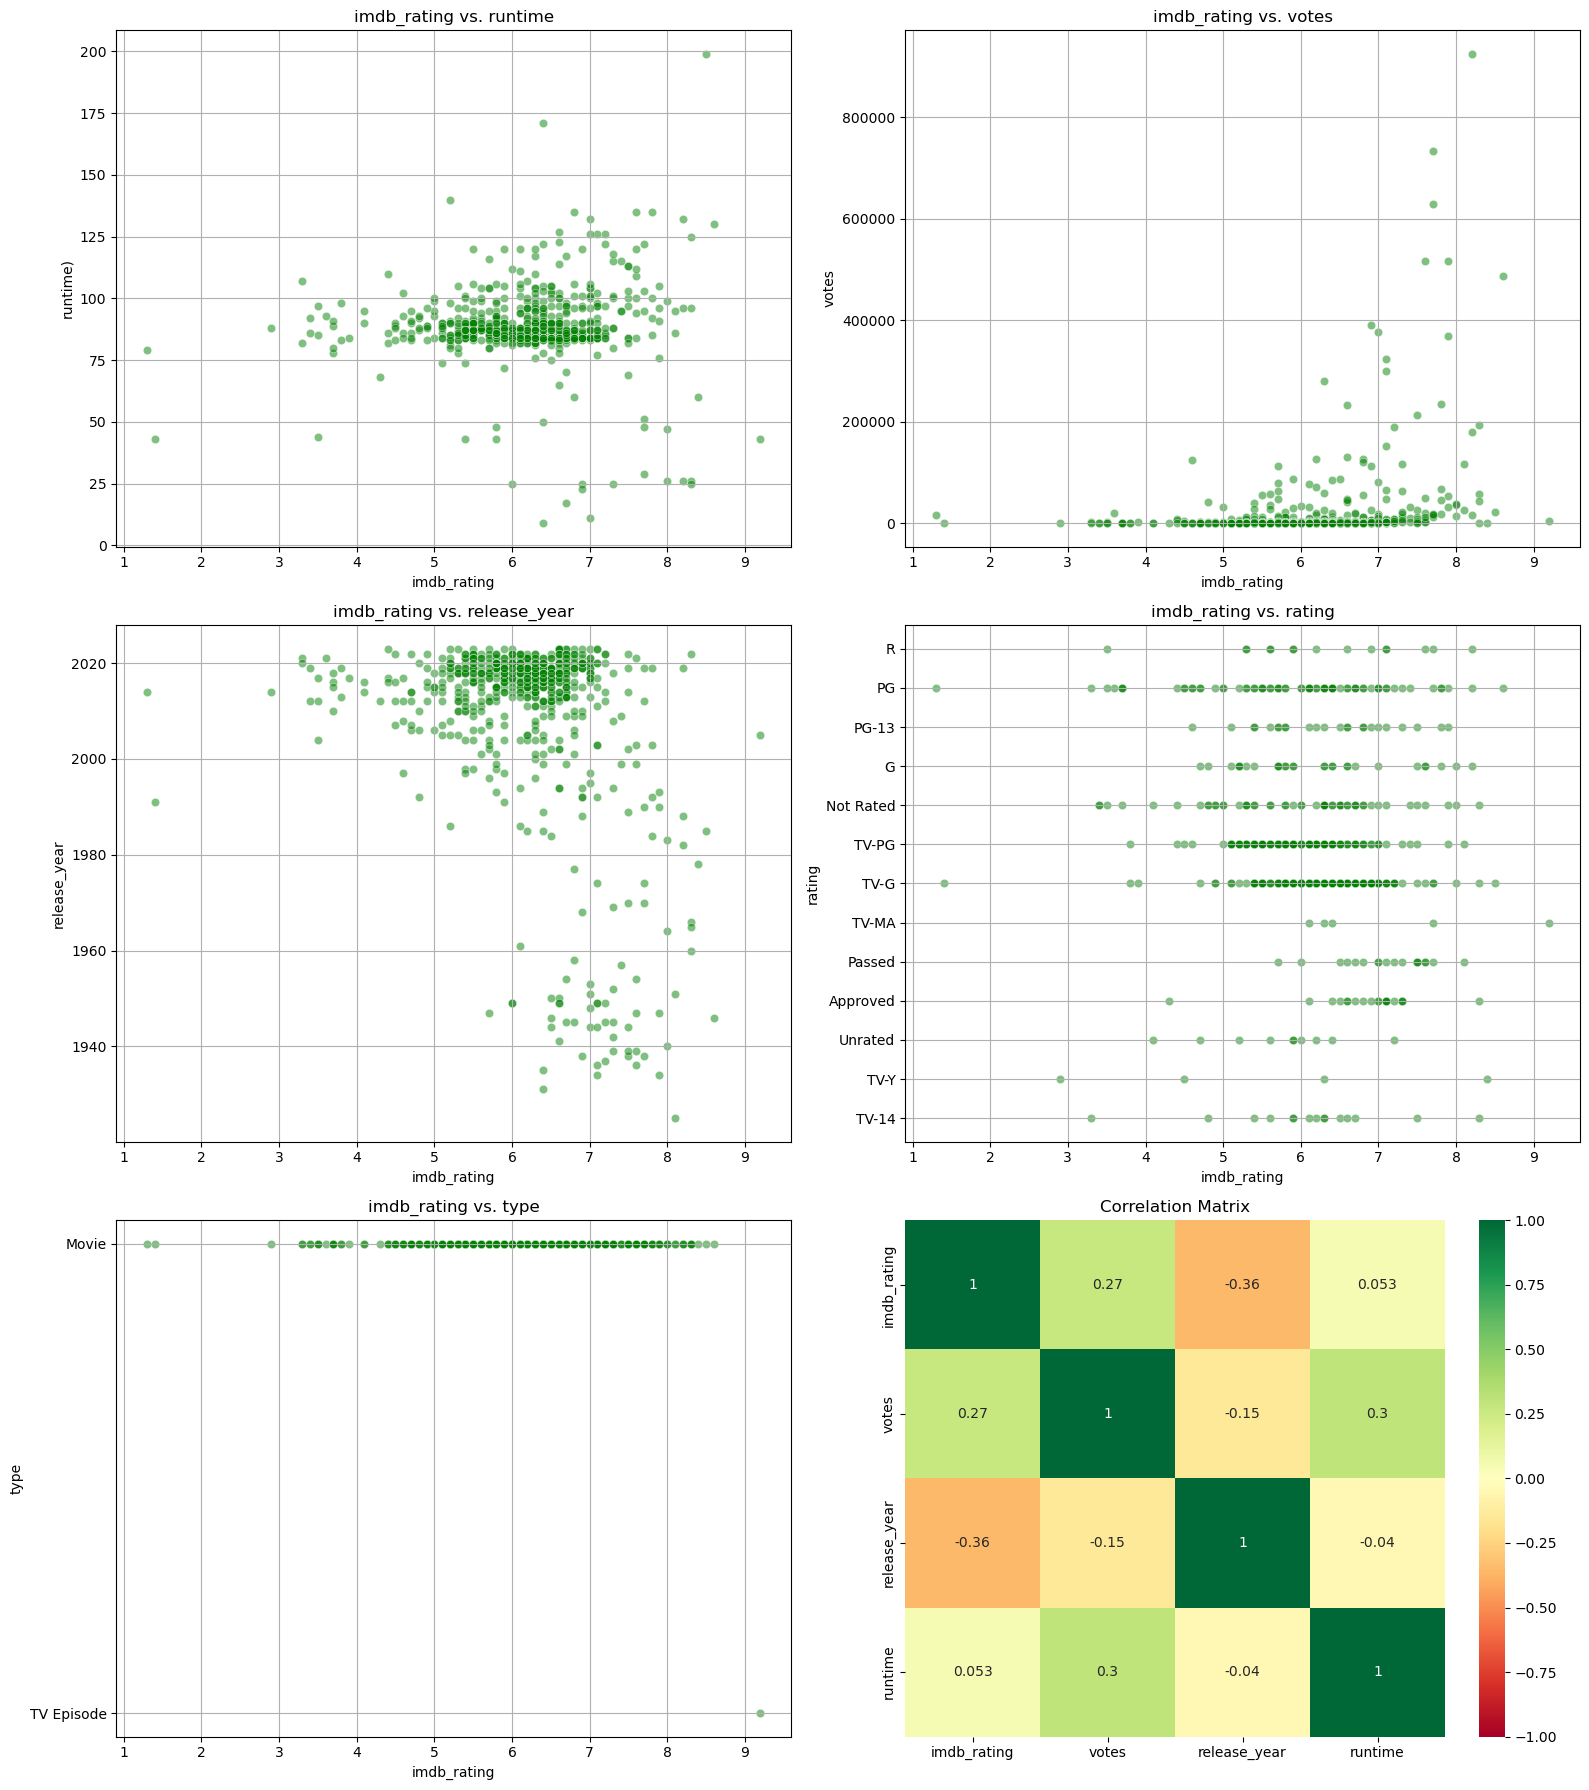

In [88]:
fig, axes = plt.subplots(3, 2, figsize=(16, 18))

sns.scatterplot(x=df['imdb_rating'], y=df['runtime'], alpha=0.5, ax=axes[0, 0], color='green')
axes[0, 0].set_title('imdb_rating vs. runtime')
axes[0, 0].set_xlabel('imdb_rating')
axes[0, 0].set_ylabel('runtime)')
axes[0, 0].grid(True)


sns.scatterplot(x=df['imdb_rating'], y=df['votes'], alpha=0.5, ax=axes[0, 1], color='green')
axes[0, 1].set_title('imdb_rating vs. votes')
axes[0, 1].set_xlabel('imdb_rating')
axes[0, 1].set_ylabel('votes')
axes[0, 1].grid(True)


sns.scatterplot(x=df['imdb_rating'], y=df['release_year'], alpha=0.5, ax=axes[1, 0], color='green')
axes[1, 0].set_title('imdb_rating vs. release_year')
axes[1, 0].set_xlabel('imdb_rating')
axes[1, 0].set_ylabel('release_year')
axes[1, 0].grid(True)


sns.scatterplot(x=df['imdb_rating'], y=df['rating'], alpha=0.5, ax=axes[1, 1], color='green')
axes[1, 1].set_title('imdb_rating vs. rating')
axes[1, 1].set_xlabel('imdb_rating')
axes[1, 1].set_ylabel('rating')
axes[1, 1].grid(True)


sns.scatterplot(x=df['imdb_rating'], y=df['type'], alpha=0.5, ax=axes[2, 0], color='green')
axes[2, 0].set_title('imdb_rating vs. type')
axes[2, 0].set_xlabel('imdb_rating')
axes[2, 0].set_ylabel('type')
axes[2, 0].grid(True)


numeric_features = df[['imdb_rating', 'votes', 'release_year', 'runtime']]
correlation_matrix = numeric_features.corr()
sns.heatmap(correlation_matrix, annot=True, vmin=-1, vmax=1, ax=axes[2, 1], cmap='RdYlGn')
axes[2, 1].set_title('Correlation Matrix')

plt.tight_layout()
plt.show()

### 1. Setting Up the Figure and Axes ###

- We create a 3x2 grid of subplots for visualizations.
- figsize=(16, 18) sets the overall figure size for better readability.

### 2. Scatter Plots for Feature Relationships ###
Each scatter plot visualizes the relationship between imdb_rating and another feature. The scatter plots are positioned in specific axes (axes[row, column]) in the grid.

#### a. Scatter Plot: imdb_rating vs. runtime ####
- A scatter plot is created for imdb_rating (x-axis) and runtime (y-axis), with transparency (alpha=0.5) for overlapping points and green points.
- Titles and labels are added for clarity.
- A grid is enabled for better visualization of point alignment.
#### b. Scatter Plot: imdb_rating vs. votes ####
- Shows the relationship between imdb_rating and the number of votes. Follows a similar setup as the previous scatter plot.
#### c. Scatter Plot: imdb_rating vs. release_year ####
- Examines the relationship between imdb_rating and release_year. It may reveal trends like whether older or newer movies have better ratings.
#### d. Scatter Plot: imdb_rating vs. rating ####
- Visualizes the relationship between imdb_rating and movie rating (e.g., PG, R). This might show how ratings vary across content ratings.
#### e. Scatter Plot: imdb_rating vs. type ####
- Plots the relationship between imdb_rating and type (e.g., Movie vs. TV Show). Since type may be categorical, this plot may have discrete y-values.
### 3. Correlation Matrix Heatmap ###
- Selecting Numeric Features: A subset of numeric columns (imdb_rating, votes, release_year, and runtime) is extracted for correlation analysis.
- Calculating Correlations: The .corr() method computes pairwise Pearson correlation coefficients.
- Creating a Heatmap:
 annot=True displays the correlation values on the heatmap.
 vmin=-1 and vmax=1 set the range for the color scale.
 cmap='RdYlGn' uses a red-yellow-green gradient to indicate correlation strength.


The results from the visualizations reveal the following:

- imdb_rating vs. runtime: There’s no strong pattern, but most movies have runtimes clustered around 100 minutes, regardless of IMDb rating.

- imdb_rating vs. votes: Higher IMDb ratings generally correlate with more votes, but there are exceptions, and some low-rated movies still have a significant number of votes.

- imdb_rating vs. release_year: More recent movies (post-2000) dominate the dataset, but ratings remain distributed across years, with no clear trend over time.

- imdb_rating vs. rating: Ratings like "PG-13" and "R" dominate, showing that IMDb ratings are distributed across different audience ratings.

- imdb_rating vs. type: Most entries are categorized as "Movies," with little diversity in type.

Correlation Matrix:

- Weak correlations across features (no values close to 1 or -1).
- Votes have a slight positive correlation with IMDb rating (0.27).
- Release year has a weak negative correlation with IMDb rating (-0.36).

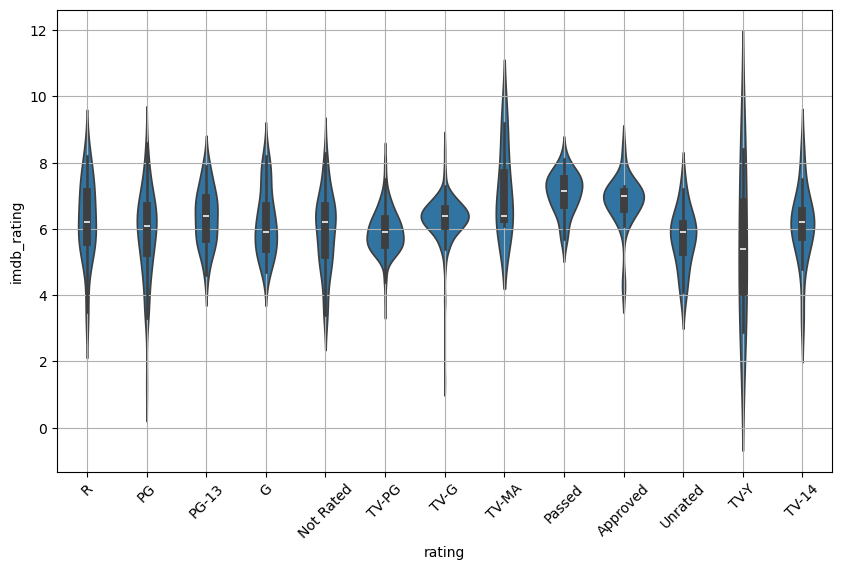

In [91]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='rating', y='imdb_rating', data=df)
plt.xlabel('rating')
plt.ylabel('imdb_rating')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

This code creates a violin plot to visualize how IMDb ratings are distributed across different content ratings (e.g., PG, R) in the dataset. The plot shows the range, median, and density of ratings for each category, helping identify patterns or variations in IMDb ratings based on content ratings.

In [93]:
ratings = df.groupby(['rating']).size().reset_index(name='counts')
ratings

fig = px.pie(ratings, names = 'rating',values = 'counts',
             title = 'Distribution of ratings',height =  600 , width = 600)
fig.show()

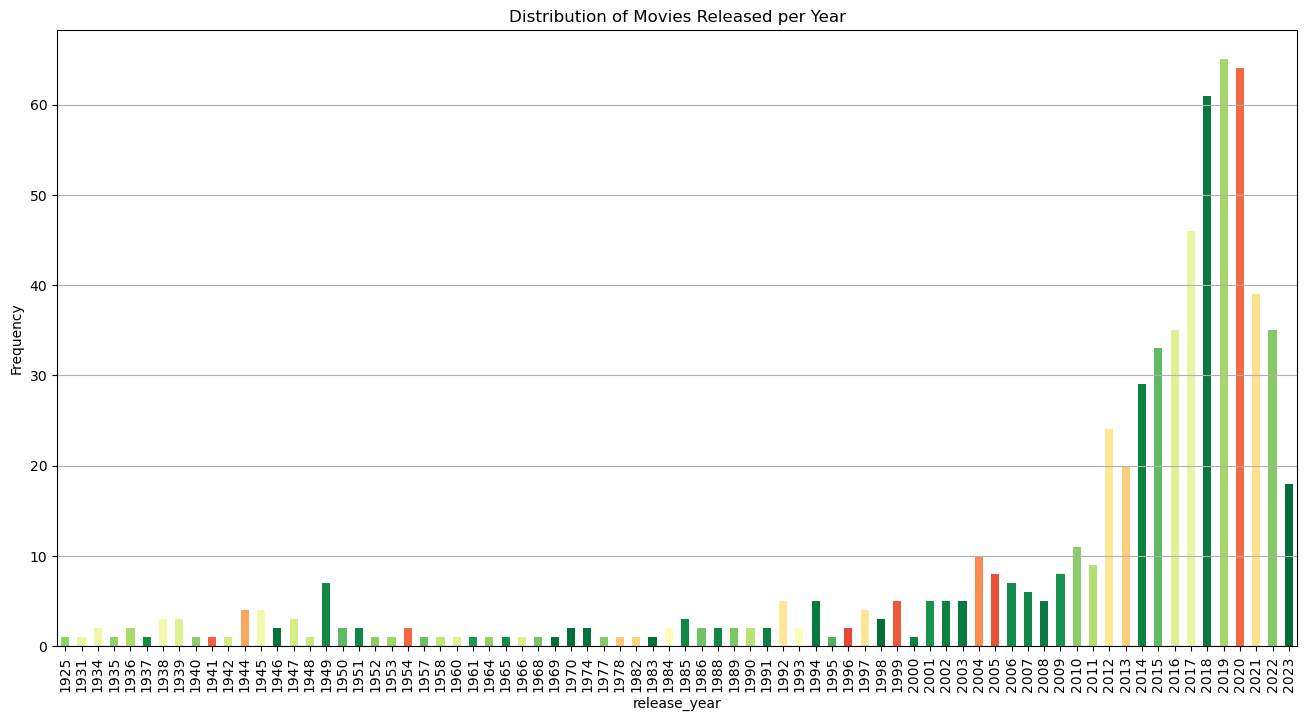

In [94]:
years = df["release_year"].unique()
years.sort()

colors = sns.color_palette("RdYlGn", len(years))

color_mapping = {year: colors[i] for i, year in enumerate(years)}

bar_colors = df["release_year"].map(color_mapping)

Freq = df["release_year"].value_counts().sort_index().plot(
    kind="bar", 
    title="Distribution of Movies Released per Year", 
    figsize=(16, 8), 
    color=bar_colors
)

Freq.set_xlabel("release_year")
Freq.set_ylabel("Frequency")
plt.grid(True, axis='y')
plt.show()

/var/folders/p_/m08314rn20v0w9bv1757z7b40000gn/T/ipykernel_7749/1989182750.py:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




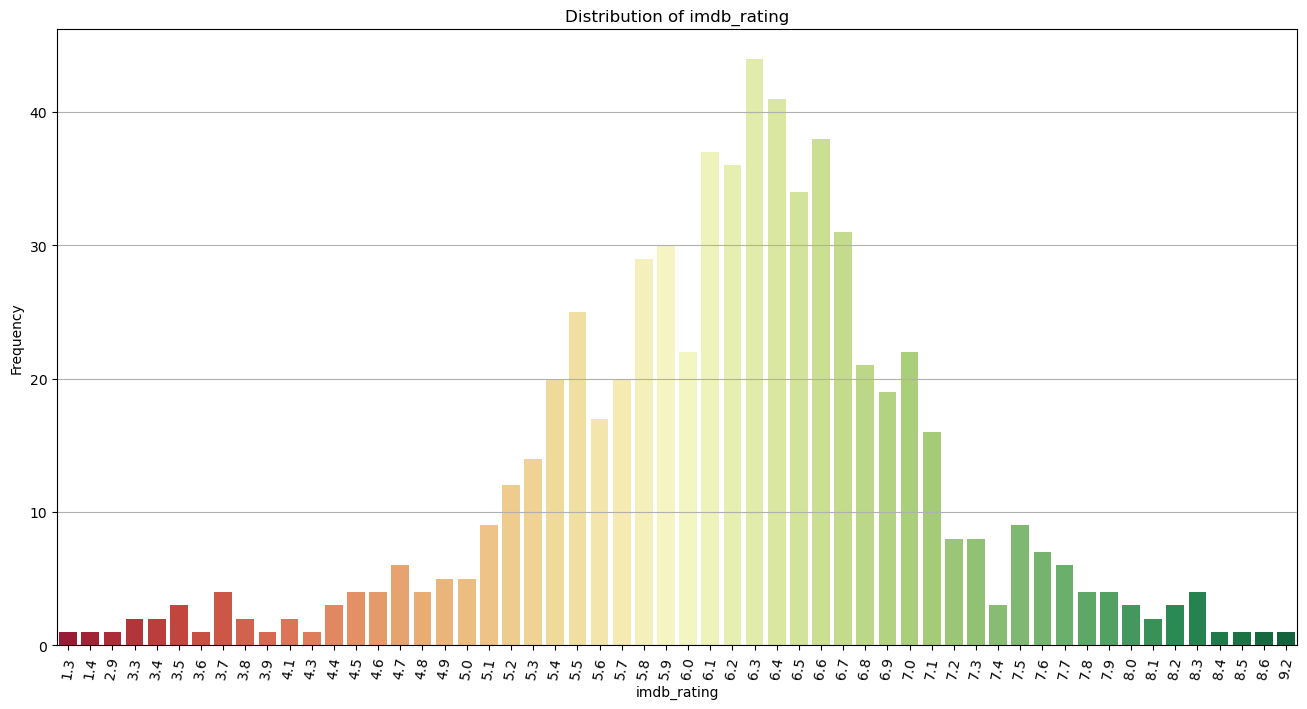

In [95]:
Distribution_imdb_rating = df['imdb_rating'].value_counts().sort_index()

plt.figure(figsize=(16, 8))
sns.barplot(x=Distribution_imdb_rating.index, y=Distribution_imdb_rating.values, palette='RdYlGn')
plt.title("Distribution of imdb_rating")
plt.xlabel('imdb_rating')
plt.ylabel('Frequency')
plt.xticks(rotation=80)
plt.grid(True, axis='y')
plt.show()

/var/folders/p_/m08314rn20v0w9bv1757z7b40000gn/T/ipykernel_7749/2734121688.py:8: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


/var/folders/p_/m08314rn20v0w9bv1757z7b40000gn/T/ipykernel_7749/2734121688.py:13: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



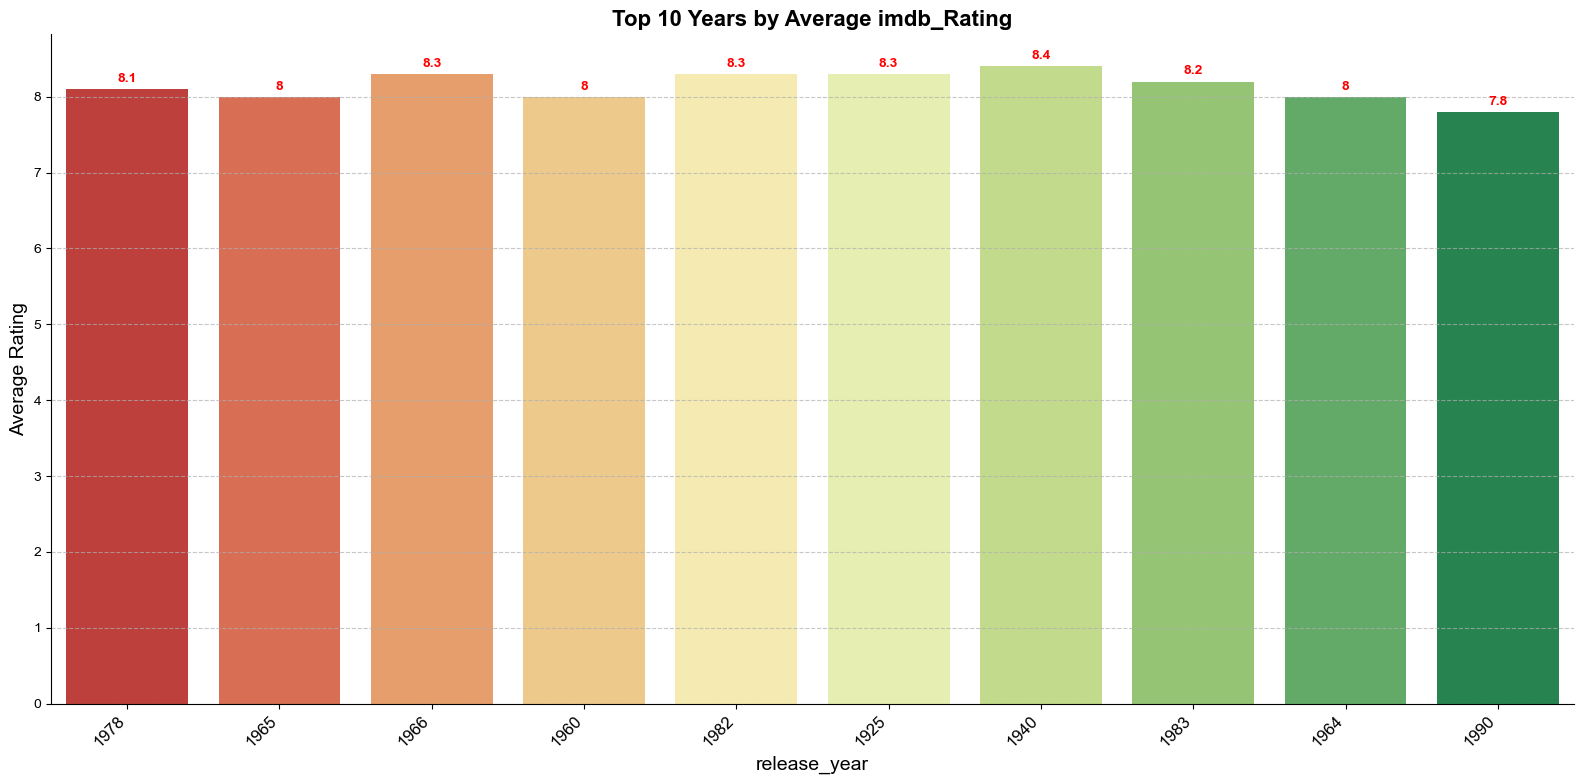

In [96]:
fig, axes = plt.subplots(figsize=(16, 8))
grouped = df.groupby("release_year")
mean = pd.DataFrame(grouped["imdb_rating"].mean())
mean1 = mean.sort_values("imdb_rating", ascending=False).head(10)

palette = sns.color_palette("magma", len(mean1))

sns.barplot(x=mean1.index, y=mean1["imdb_rating"], ax=axes, palette='RdYlGn')

for container in axes.containers:
    axes.bar_label(container, label_type="edge", padding=3, fontsize=10, color='red', weight='bold')

axes.set_xticklabels(mean1.index, rotation=45, ha='right', fontsize=12)

axes.set_xlabel('release_year', fontsize=14)
axes.set_ylabel('Average Rating', fontsize=14)
axes.set_title('Top 10 Years by Average imdb_Rating', fontsize=16, weight='bold')

axes.grid(True, axis='y', linestyle='--', alpha=0.7)

sns.despine()

sns.set(style="darkgrid")

plt.tight_layout()
plt.show()


/var/folders/p_/m08314rn20v0w9bv1757z7b40000gn/T/ipykernel_7749/1477732890.py:10: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




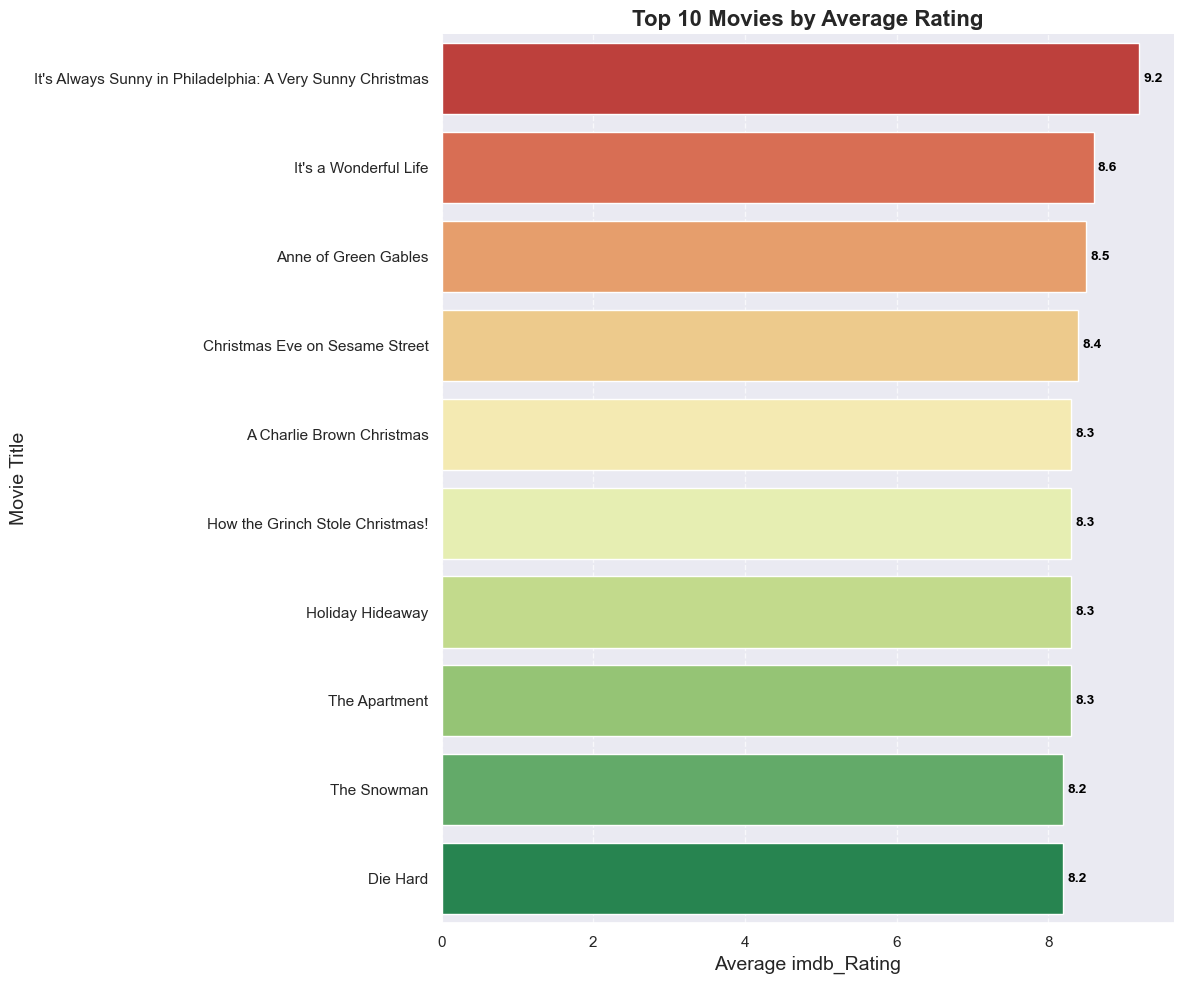

In [97]:
sns.set(style="darkgrid")

fig, axes = plt.subplots(figsize=(12, 10))
grouped = df.groupby("title")
mean = pd.DataFrame(grouped["imdb_rating"].mean())
mean1 = mean.sort_values("imdb_rating", ascending=False).head(10)

palette = sns.color_palette("magma", len(mean1))

sns.barplot(x=mean1["imdb_rating"], y=mean1.index, ax=axes, palette='RdYlGn')

for container in axes.containers:
    axes.bar_label(container, label_type="edge", padding=3, fontsize=10, color='black', weight='bold')


axes.set_xlabel('Average imdb_Rating', fontsize=14)
axes.set_ylabel('Movie Title', fontsize=14)
axes.set_title('Top 10 Movies by Average Rating', fontsize=16, weight='bold')

axes.grid(True, axis='x', linestyle='--', alpha=0.7)

sns.despine()

plt.tight_layout()
plt.show()


/var/folders/p_/m08314rn20v0w9bv1757z7b40000gn/T/ipykernel_7749/4105769871.py:10: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




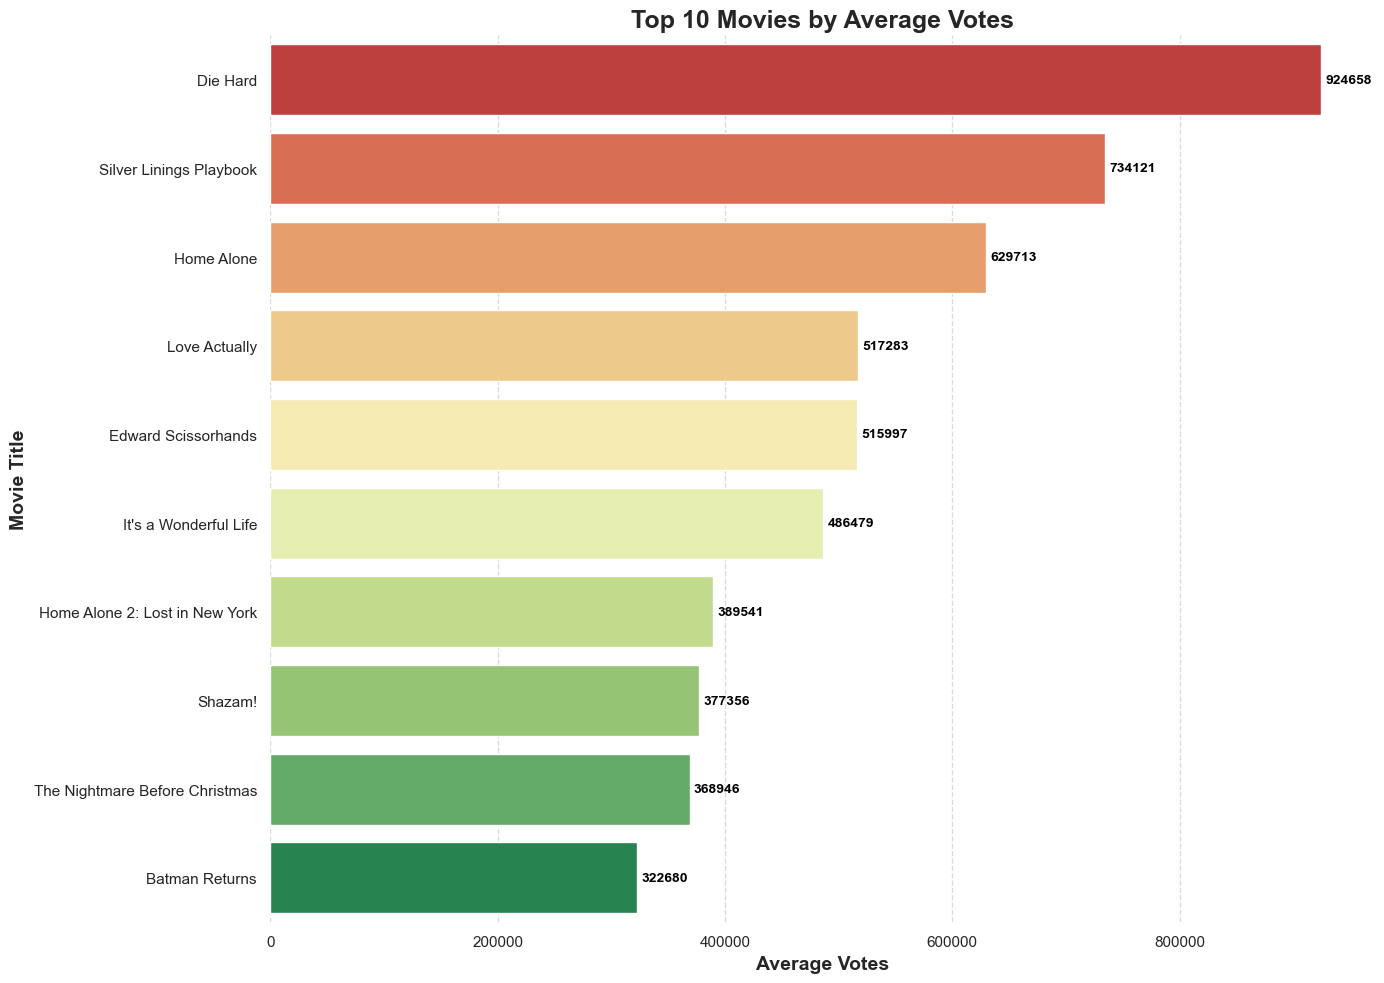

In [98]:
sns.set(style="whitegrid")

fig, axes = plt.subplots(figsize=(14, 10))
grouped = df.groupby("title")
mean = pd.DataFrame(grouped["votes"].mean())
mean1 = mean.sort_values("votes", ascending=False).head(10)

palette = sns.color_palette("magma", len(mean1))

sns.barplot(x=mean1["votes"], y=mean1.index, ax=axes, palette='RdYlGn')

for container in axes.containers:
    axes.bar_label(container, label_type="edge", padding=3, fontsize=10, color='black', weight='bold')

axes.set_xlabel('Average Votes', fontsize=14, weight='bold')
axes.set_ylabel('Movie Title', fontsize=14, weight='bold')
axes.set_title('Top 10 Movies by Average Votes', fontsize=18, weight='bold')

axes.grid(True, axis='x', linestyle='--', alpha=0.7)

sns.despine(left=True, bottom=True)

plt.tight_layout()
plt.show()

/var/folders/p_/m08314rn20v0w9bv1757z7b40000gn/T/ipykernel_7749/1954752464.py:9: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




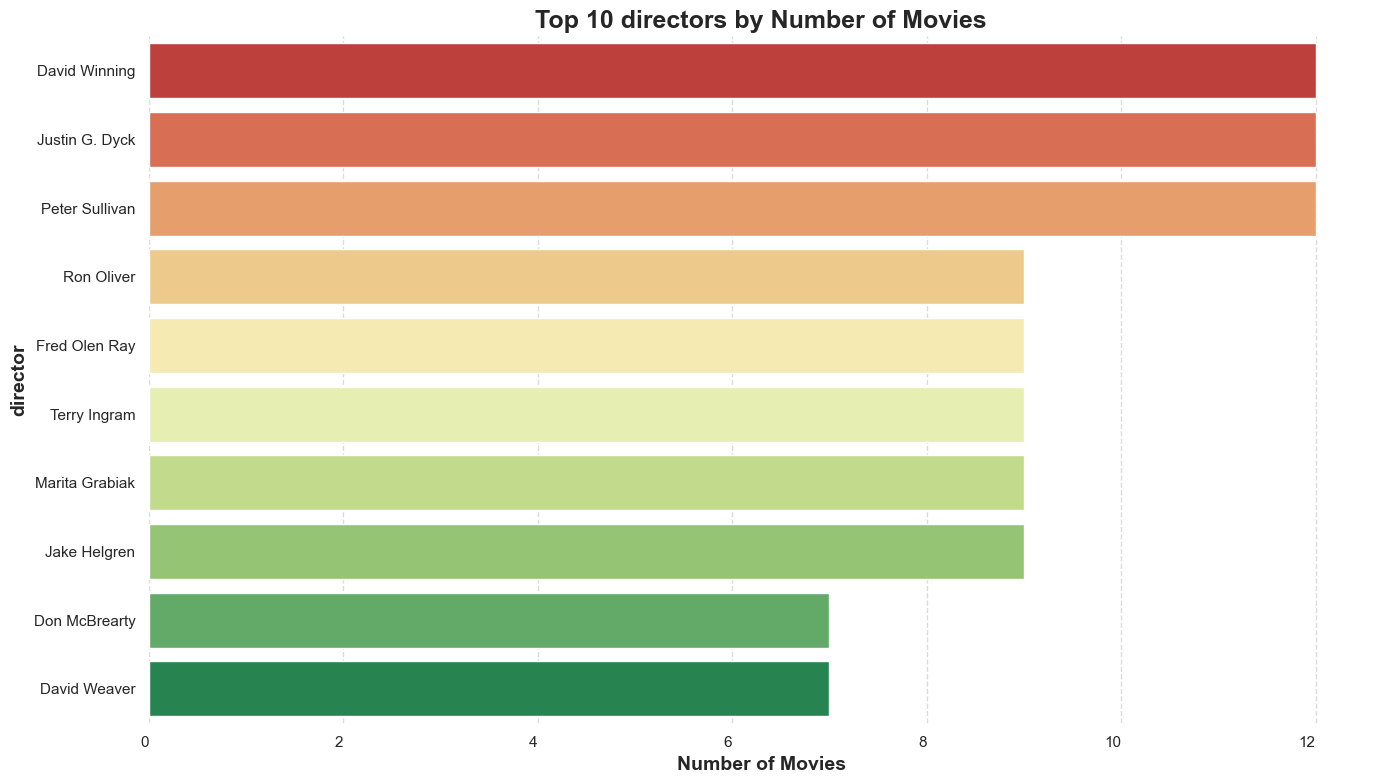

director
David Winning     12
Justin G. Dyck    12
Peter Sullivan    12
Ron Oliver         9
Fred Olen Ray      9
Terry Ingram       9
Marita Grabiak     9
Jake Helgren       9
Don McBrearty      7
David Weaver       7
Name: count, dtype: int64

In [99]:
top_directors = df['director'].value_counts().head(10)

sns.set(style="whitegrid")

plt.figure(figsize=(14, 8))

palette = sns.color_palette("RdYlGn", len(top_directors))

sns.barplot(x=top_directors.values, y=top_directors.index, palette='RdYlGn')

plt.title('Top 10 directors by Number of Movies', fontsize=18, weight='bold')
plt.xlabel('Number of Movies', fontsize=14, weight='bold')
plt.ylabel('director', fontsize=14, weight='bold')

plt.grid(True, axis='x', linestyle='--', alpha=0.7)

plt.xticks(ha='right')

sns.despine(left=True, bottom=True)

plt.tight_layout()

plt.show()

top_directors

/var/folders/p_/m08314rn20v0w9bv1757z7b40000gn/T/ipykernel_7749/1609389948.py:10: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




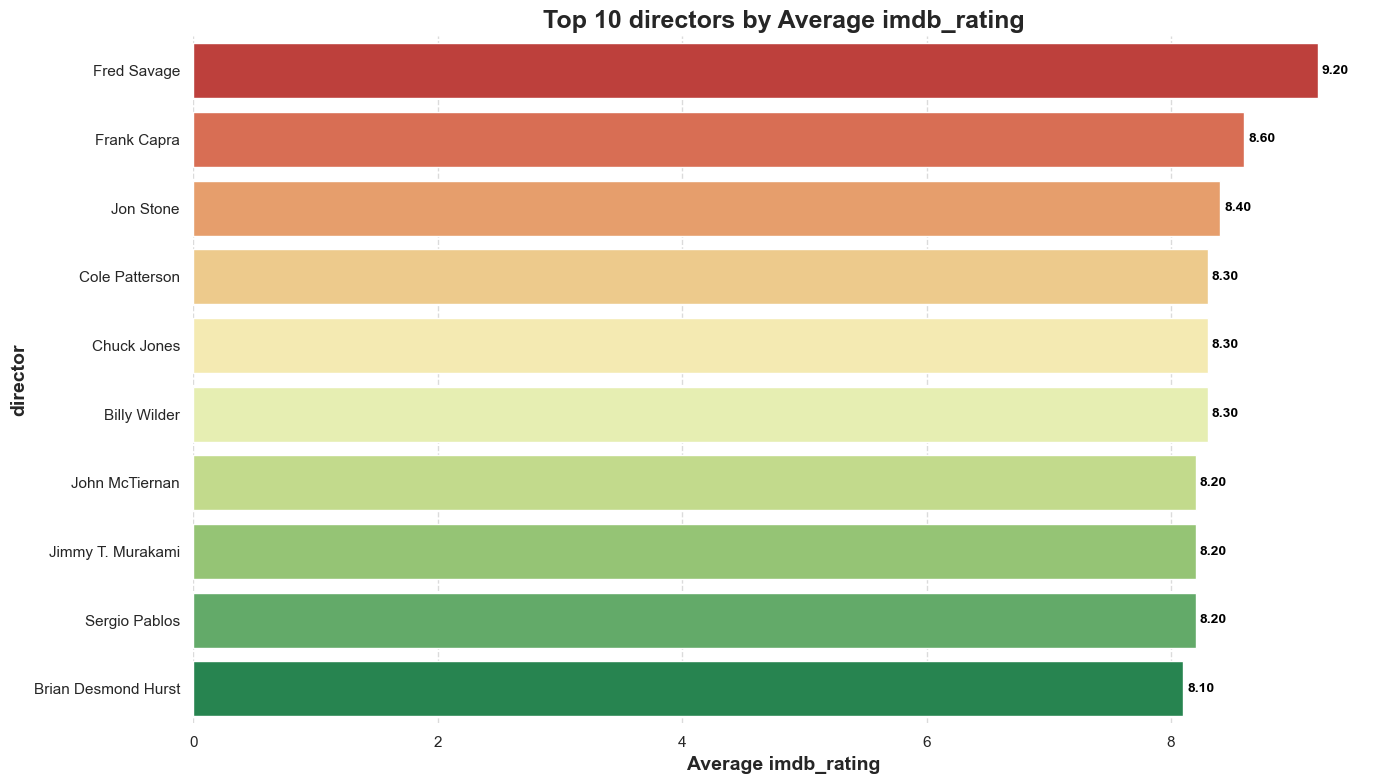

In [100]:
fig, axes = plt.subplots(figsize=(14, 8))
grouped = df.groupby("director")
mean = pd.DataFrame(grouped["imdb_rating"].mean())
mean1 = mean.sort_values("imdb_rating", ascending=False).head(10)

sns.set(style="whitegrid")

palette = sns.color_palette("RdYlGn", len(mean1))

sns.barplot(x=mean1["imdb_rating"], y=mean1.index, ax=axes, palette='RdYlGn')

for container in axes.containers:
    axes.bar_label(container, fmt="%.2f", label_type="edge", padding=3, fontsize=10, color='black', weight='bold')

axes.set_xlabel('Average imdb_rating', fontsize=14, weight='bold')
axes.set_ylabel('director', fontsize=14, weight='bold')
axes.set_title('Top 10 directors by Average imdb_rating', fontsize=18, weight='bold')

axes.grid(True, axis='x', linestyle='--', alpha=0.7)

sns.despine(left=True, bottom=True)

plt.tight_layout()

plt.show()